In [1]:
# Import the libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Basic info of the dataset

In [2]:
# Loading the dataset
data = pd.read_csv("Marketing_train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         5610 non-null   float64
 1   profession      7414 non-null   object 
 2   marital         7414 non-null   object 
 3   schooling       5259 non-null   object 
 4   default         7414 non-null   object 
 5   housing         7414 non-null   object 
 6   loan            7414 non-null   object 
 7   contact         7414 non-null   object 
 8   month           7414 non-null   object 
 9   day_of_week     6703 non-null   object 
 10  campaign        7414 non-null   int64  
 11  pdays           7414 non-null   int64  
 12  previous        7414 non-null   int64  
 13  poutcome        7414 non-null   object 
 14  emp.var.rate    7414 non-null   float64
 15  cons.price.idx  7414 non-null   float64
 16  cons.conf.idx   7414 non-null   float64
 17  euribor3m       7414 non-null   f

In [3]:
data.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,5610.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000
mean,40.009804,2.518344,960.024548,0.184111,0.052091,93.570708,-40.561316,3.583141,5165.224251
std,10.574616,2.695055,192.845029,0.516775,1.568399,0.578345,4.649800,1.744865,73.108669
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
data.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,5,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,no


In [5]:
print(data["profession"].value_counts())
print("*"*25)
print(data["marital"].value_counts())
print("*"*25)
print(data["schooling"].value_counts())

admin.           1885
blue-collar      1665
technician       1212
services          719
management        536
retired           307
entrepreneur      275
self-employed     248
housemaid         187
unemployed        173
student           146
unknown            61
Name: profession, dtype: int64
*************************
married     4445
single      2118
divorced     843
unknown        8
Name: marital, dtype: int64
*************************
university.degree      1554
high.school            1216
basic.9y                784
professional.course     664
basic.4y                534
basic.6y                275
unknown                 231
illiterate                1
Name: schooling, dtype: int64


In [6]:
print(data["responded"].value_counts())

no     6574
yes     840
Name: responded, dtype: int64


From the above distribution we can be sure that the data is imbalanced, as the number of "no"s are also 8 times the number of "yes"

# Exploratory Data Analysis

### Distribution of Class variable

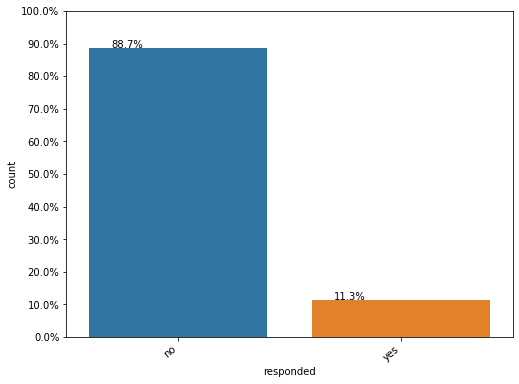

In [7]:
plt.figure(figsize=(8,6))
Y = data["responded"]
total = len(Y)*1.
ax=sns.countplot(x="responded", data=data)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    
ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
plt.show()

# Univariate Analysis

In [8]:
def countplot(label, dataset):
    plt.figure(figsize=(15,10))
    Y = data[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset)
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
    plt.show()

In [9]:

%matplotlib inline

def countplot_withY(label, dataset):
    plt.figure(figsize=(20,10))
    Y = data[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset, hue="responded")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
    plt.show()

## Feature: Job (Categorical variable)

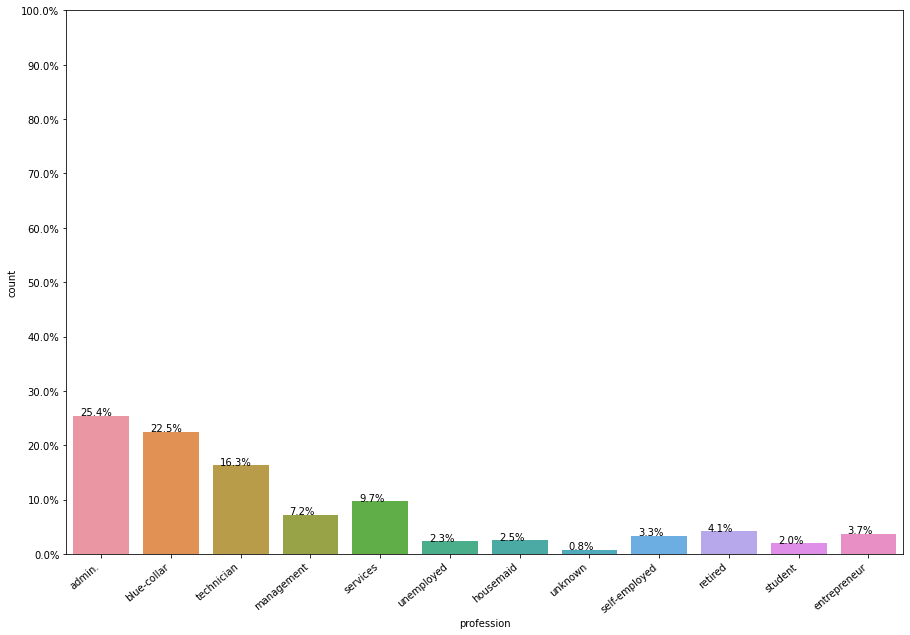

In [10]:
countplot("profession", data)

From the above distribution we can see that most of the customers have jobs as "admin", "blue-collar" or "technician". One interesting thing to find out would be to see the distribution for each classes as well. For example, how many people who work as an admin have subscribed a term deposit.

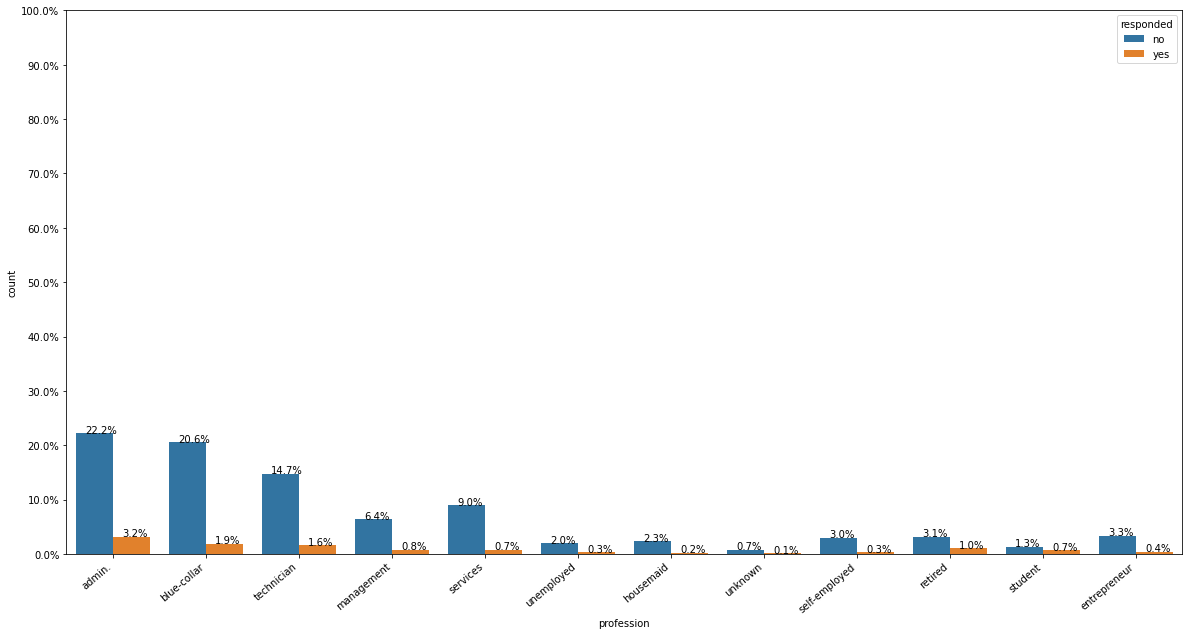

In [11]:
countplot_withY("profession", data)

From the above plot, we can see that the customers who have a job of admin have the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing. This is simply because we have more customers working as admin than any other profession. 

We can find out the odds or ratio of subscribing and not subscribing based on the profession, to find out which profession has the highest odds of subscribing given the data. At this point we are not sure if there is any correlation between job and target variable.

**Idea:** If we find that odds of one profession subscribing is greater than other job, we can use the odds or log(odds) as a feature by replacing jobs field with the odds, instead of doing one hot encoding.

## Feature: Marital (Categorical feature)

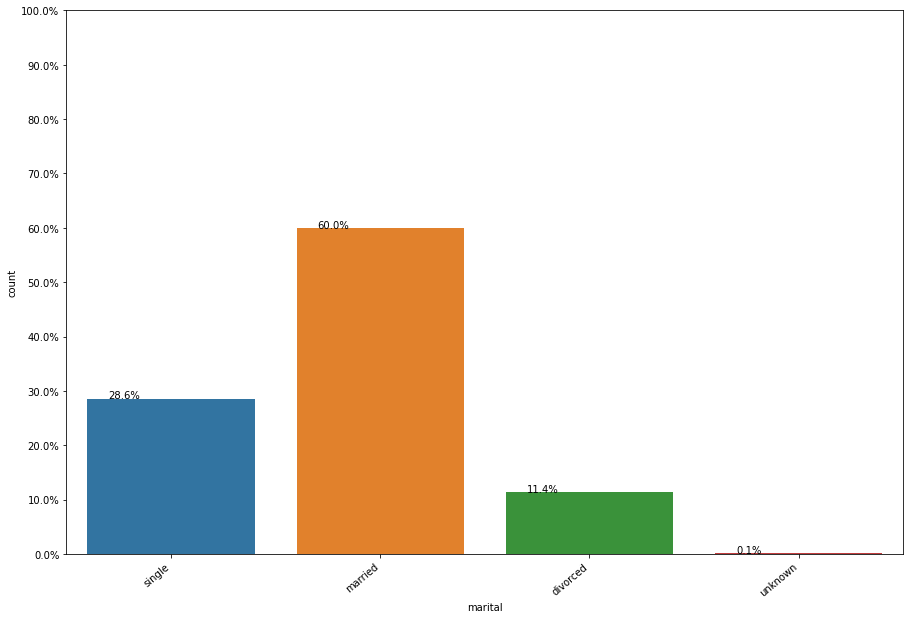

In [12]:
countplot("marital", data)

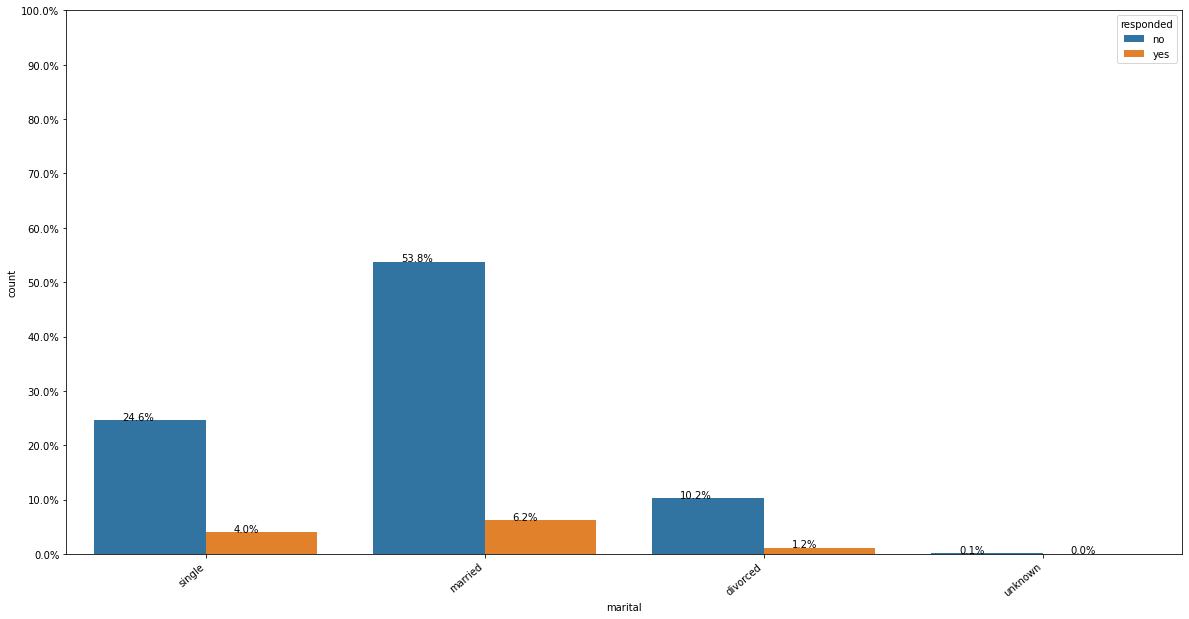

In [13]:
countplot_withY("marital", data)

## Feature: default (categorical)

This is a categorical feature which means "has credit in default", with the values "yes" and "no" and "unknown".

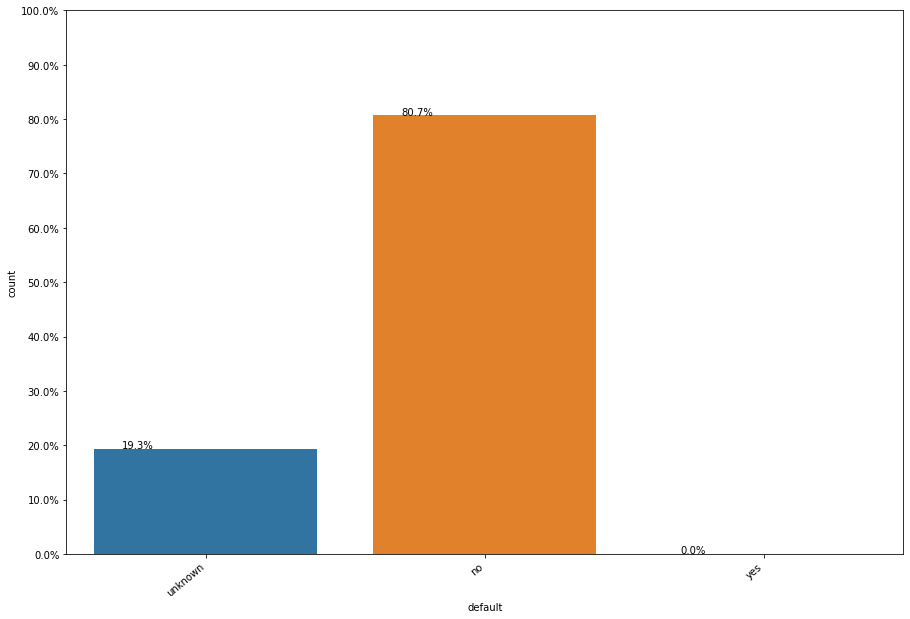

In [14]:
countplot("default", data)

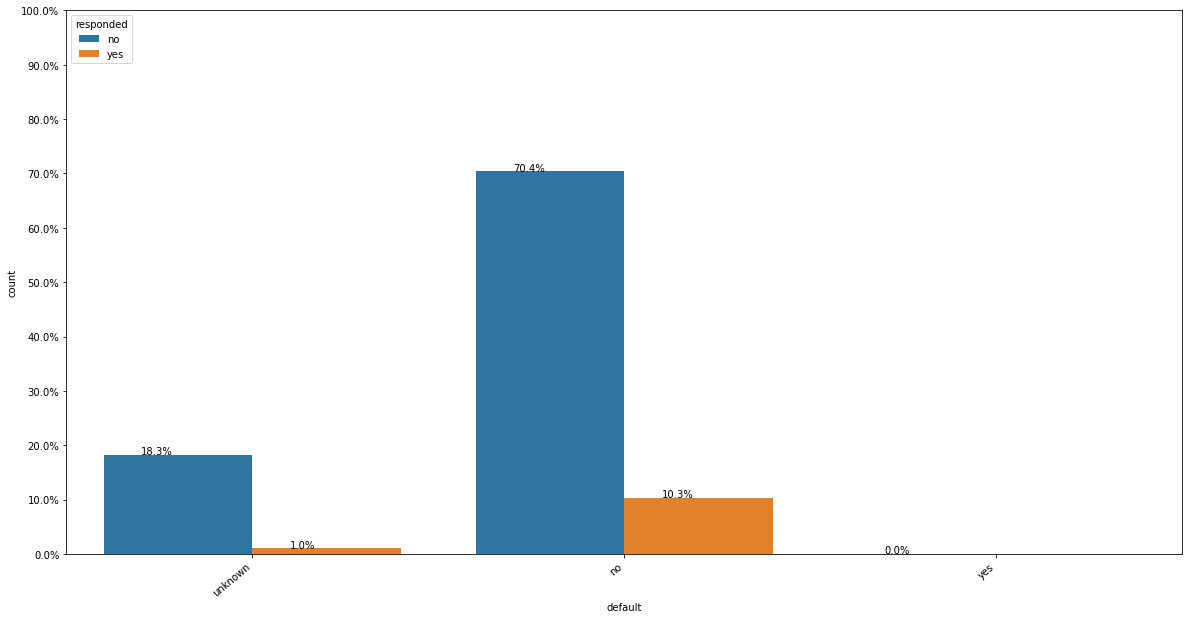

In [15]:
countplot_withY("default", data)

There is no customer with who has credit in default. Majority of the customers don't have, and the for the rest of the customers this field is unknown.

## Feature: Education

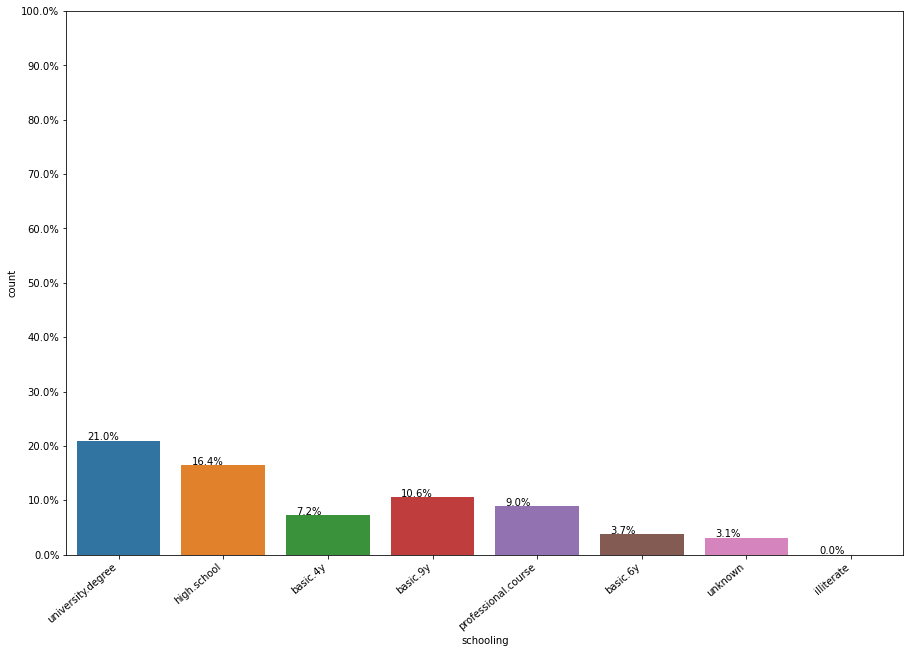

In [16]:
countplot("schooling",data)

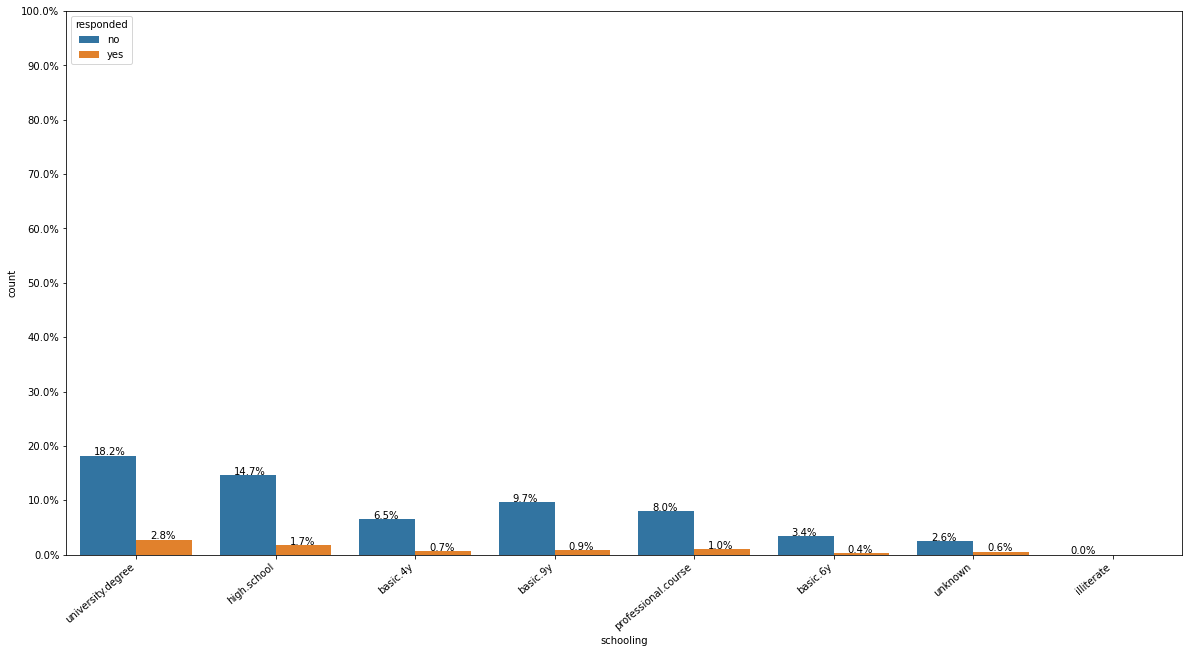

In [17]:
countplot_withY("schooling", data)

## Feature: housing (Categorical)

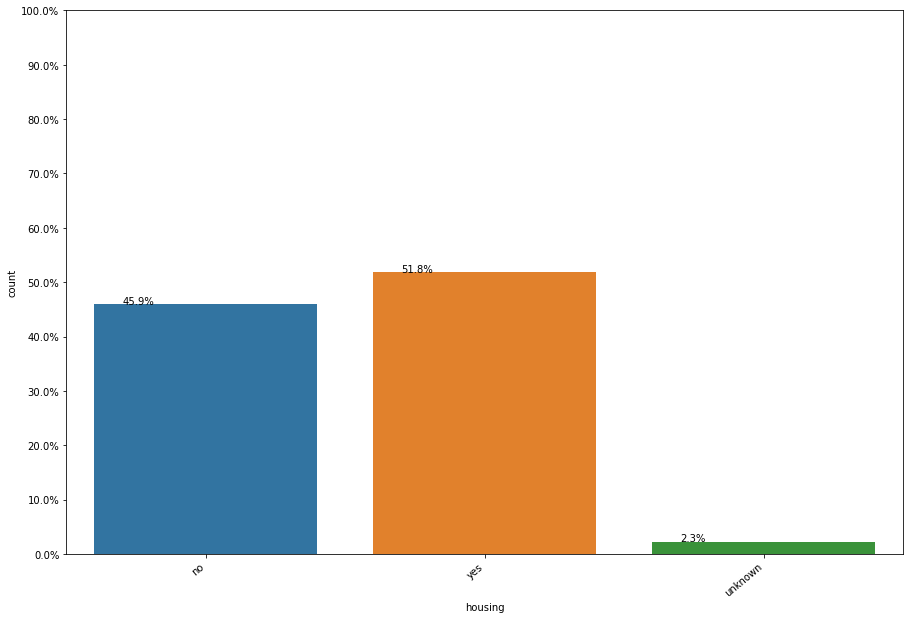

In [18]:
countplot("housing", data)

Majority of the customers have a housing loan.

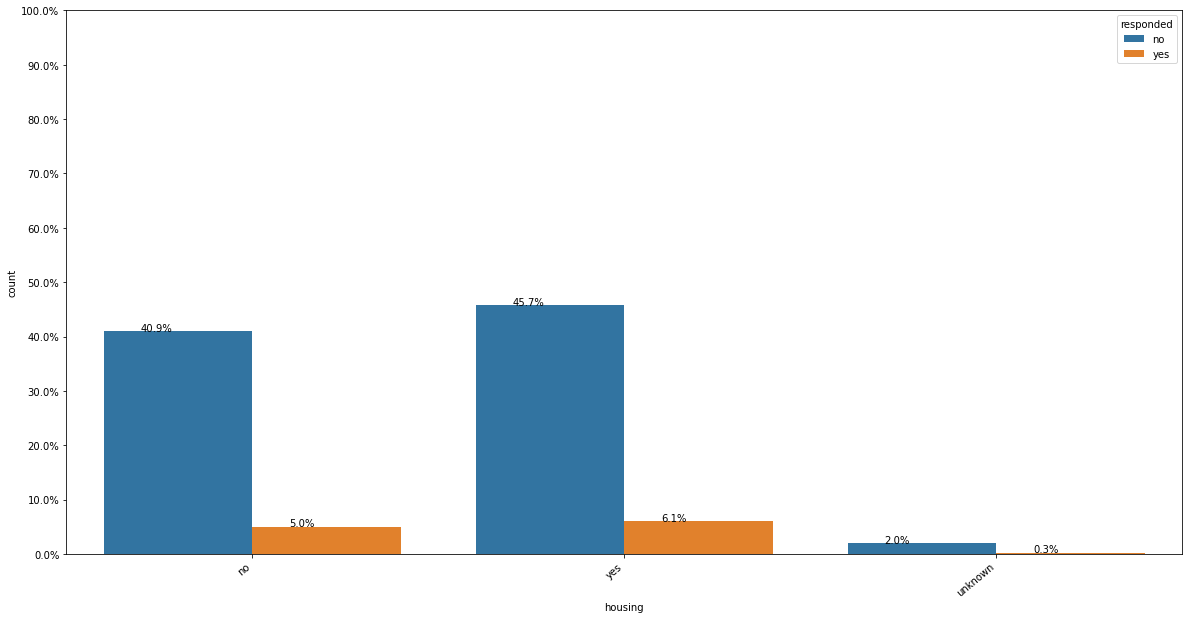

In [19]:
countplot_withY("housing", data)

## Feature: loan (Categorical)

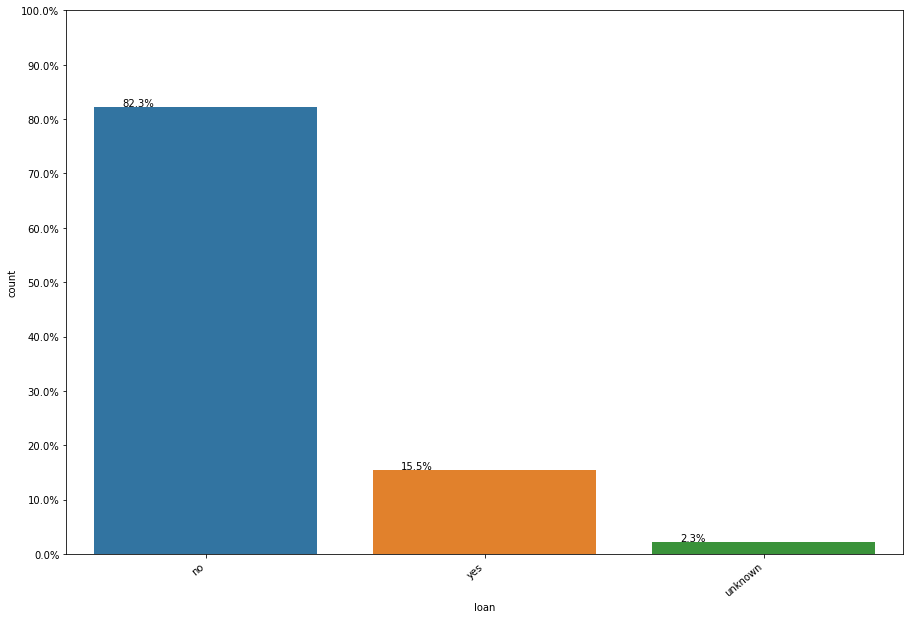

In [20]:
countplot("loan", data)

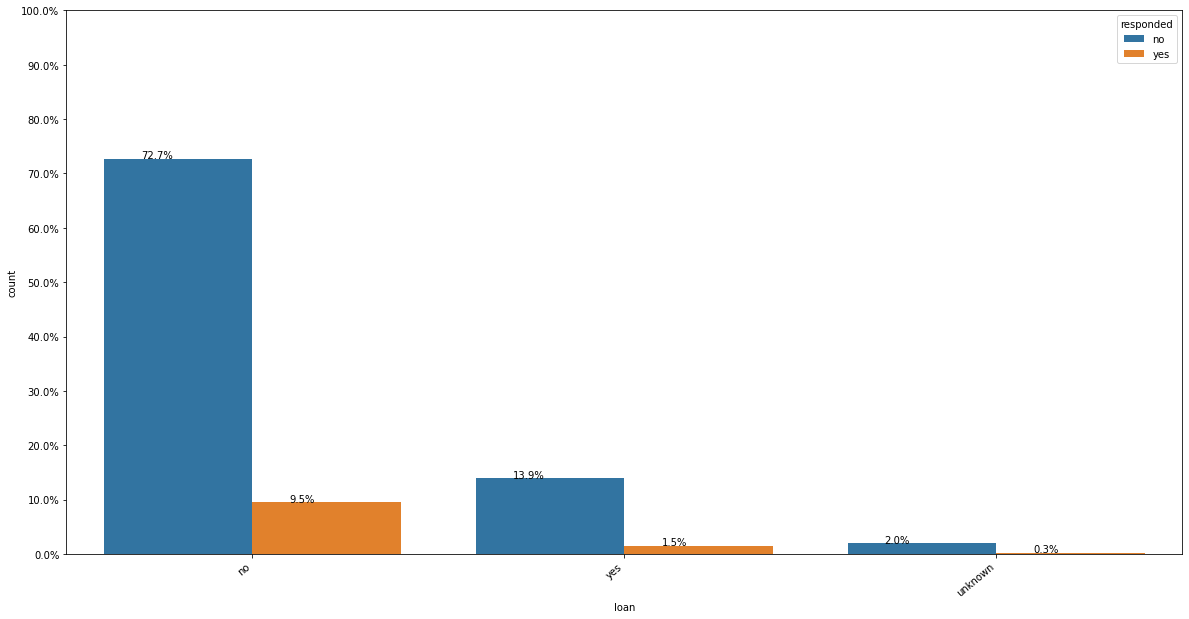

In [21]:
countplot_withY("loan", data)

## Feature: contact (Categorical)

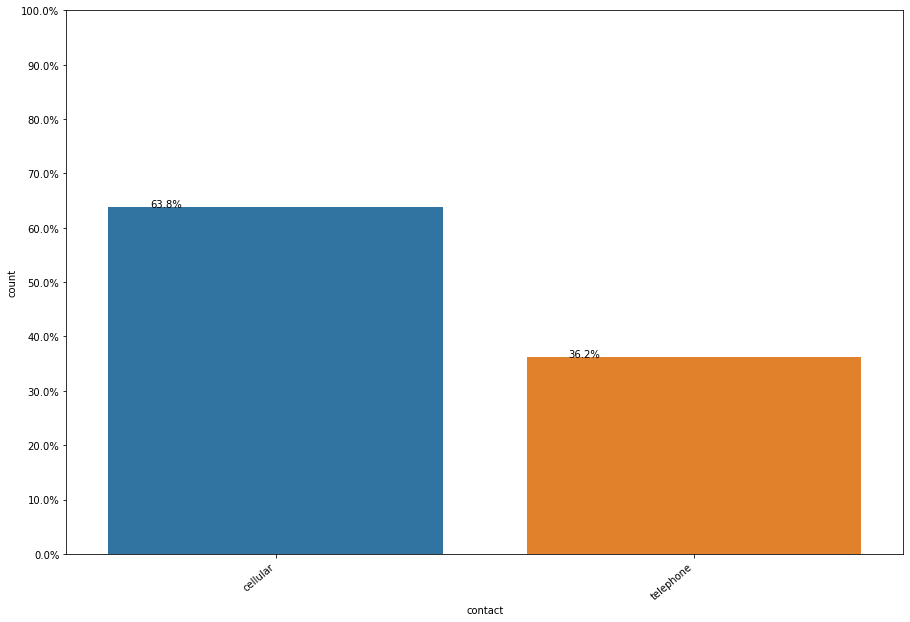

In [22]:
countplot("contact", data)

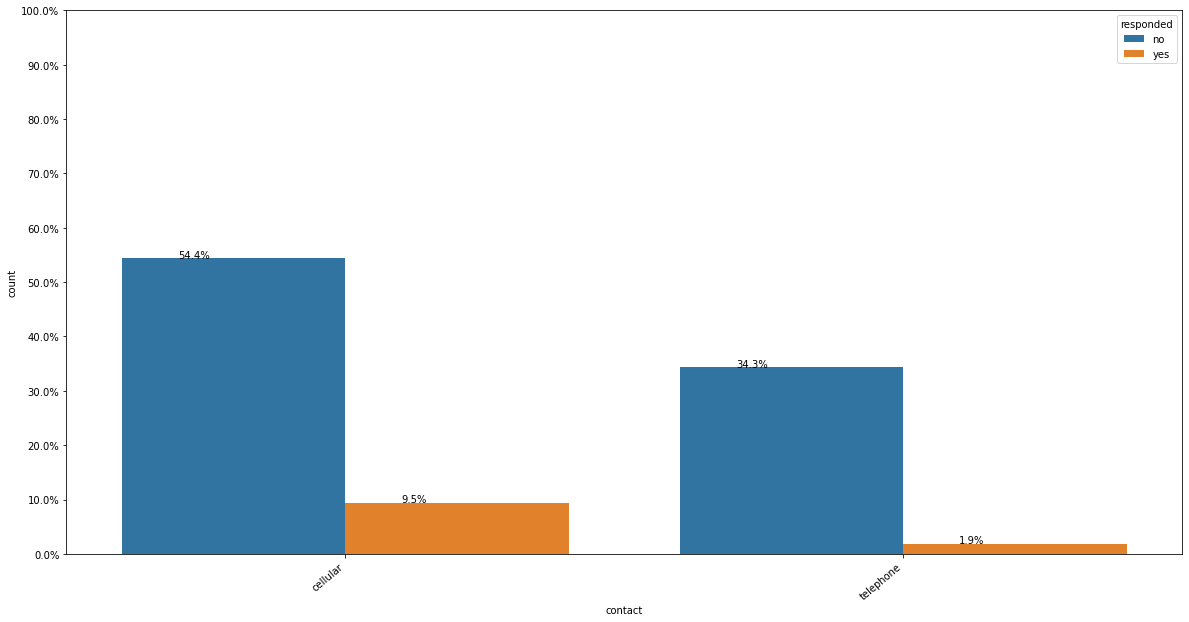

In [23]:
countplot_withY("contact", data)

## Feature: month (Categorical)

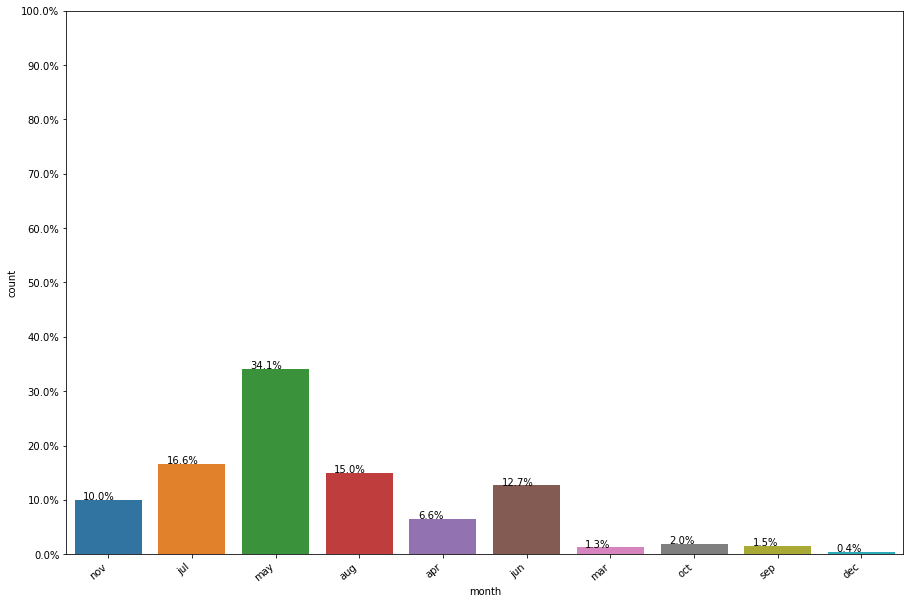

In [24]:
countplot("month", data)

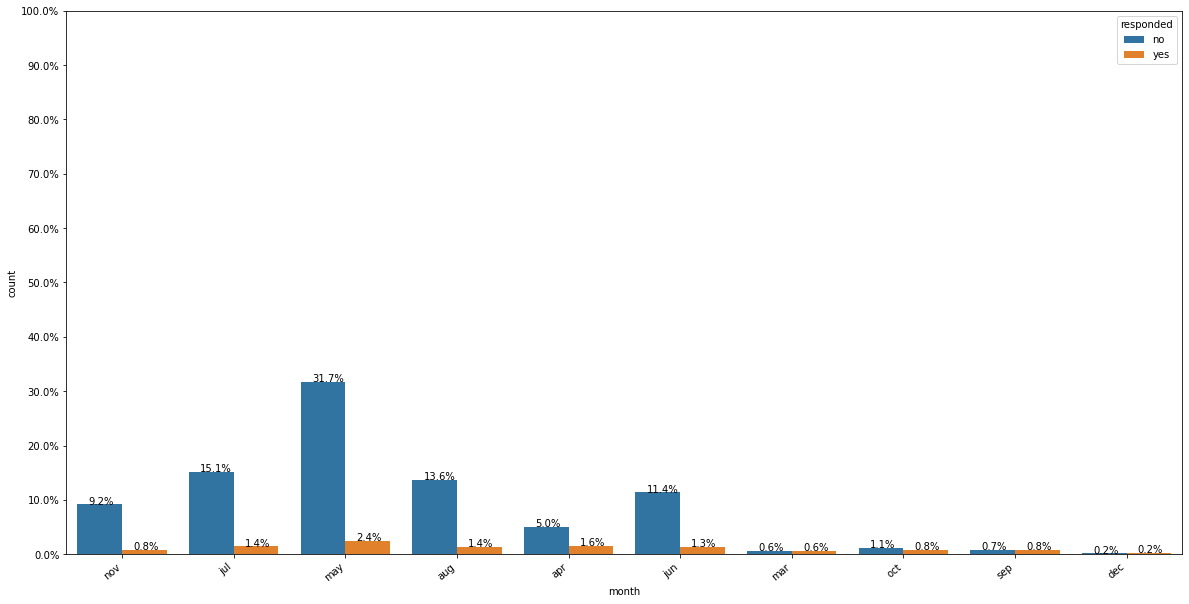

In [25]:
countplot_withY("month", data)

## Feature: day_of_week (Categorical)

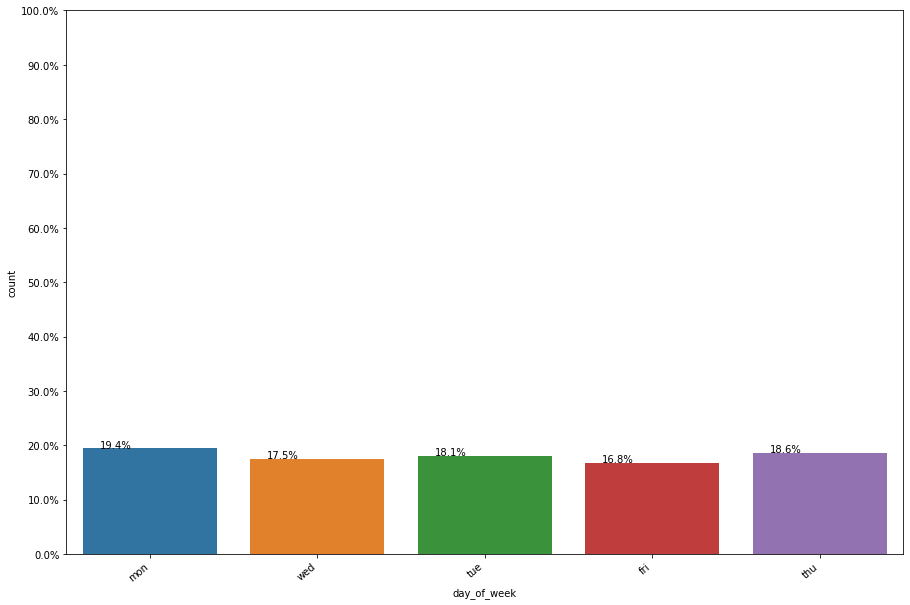

In [26]:
countplot("day_of_week", data)

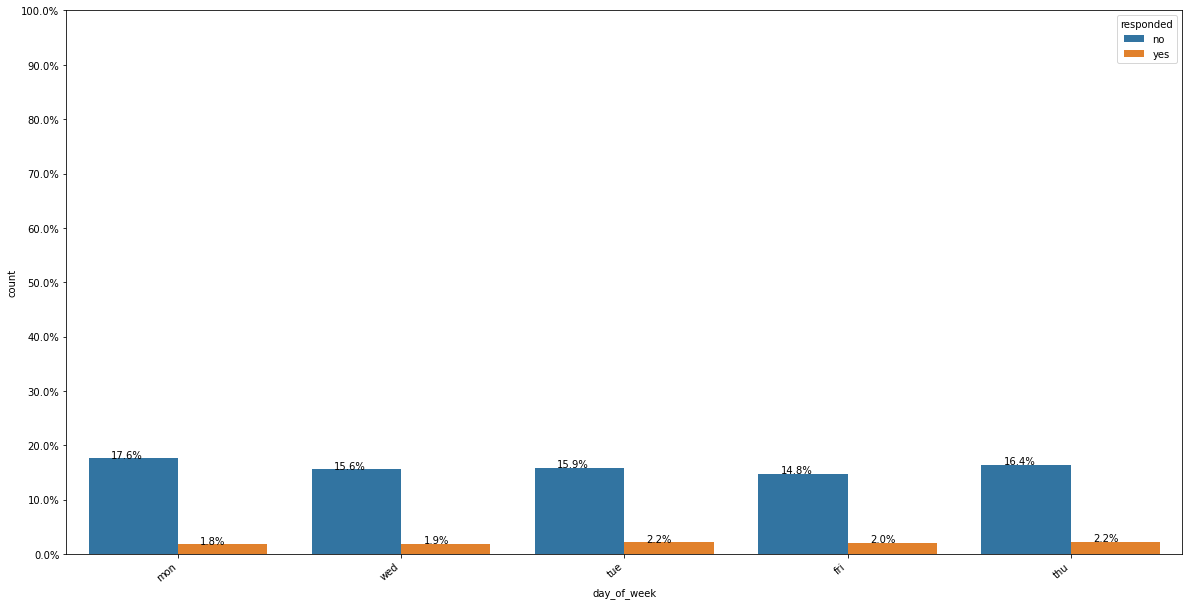

In [27]:
countplot_withY("day_of_week", data)

The day of the week seems to be irrelevent as we have the same amount of data for all the days of the week, and no:yes ratio is also almost same.

## Feature: poutcome (Categorical)

This feature indicates the outcome of the previous marketing campaign

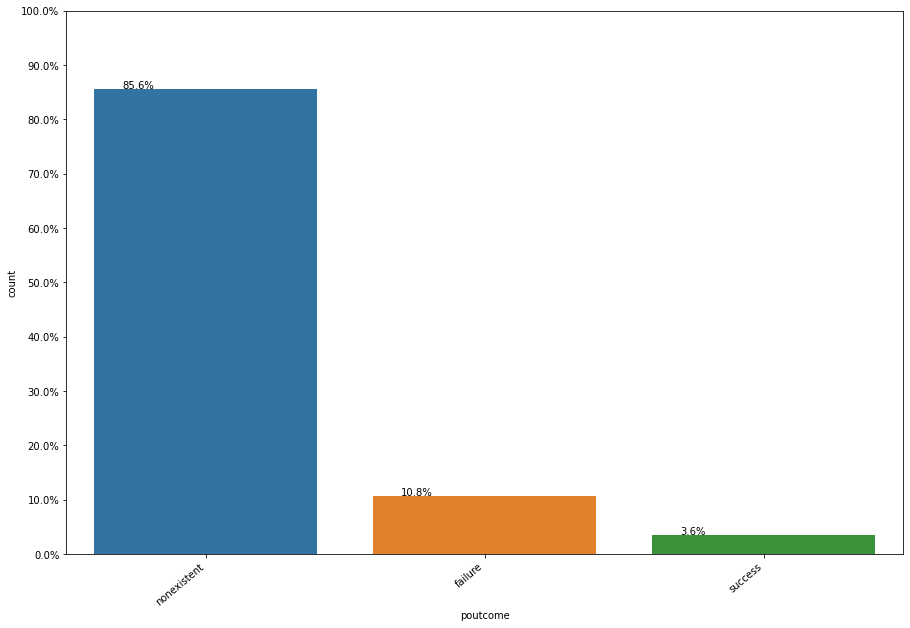

In [28]:
countplot("poutcome", data)

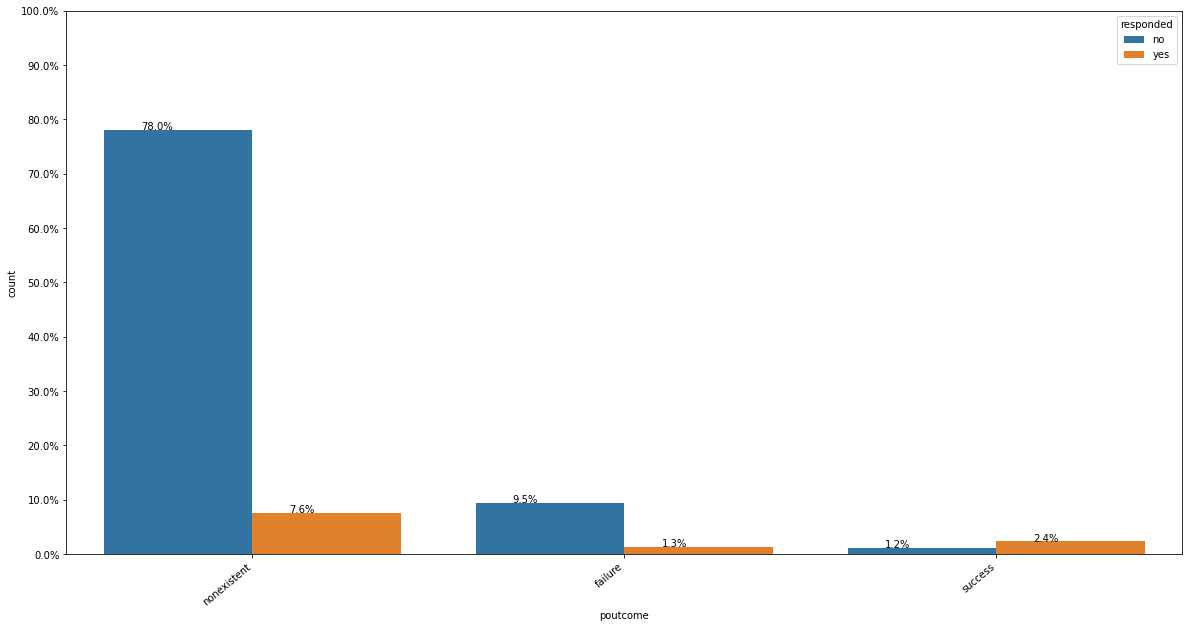

In [29]:
countplot_withY("poutcome", data)

## Feature: Age (Numeric)

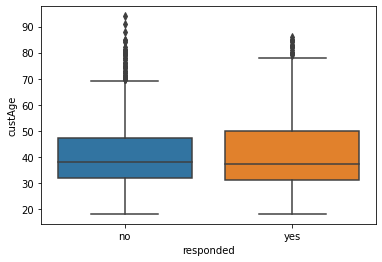

In [30]:
%matplotlib inline
sns.boxplot(data=data, x="responded", y="custAge")
plt.show()

From the above boxplot we know that for both the customers that subscibed or didn't subscribe a term deposit, has a median age of around 38-40. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for which customer will subscribe and which customer will not.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='custAge', ylabel='Density'>

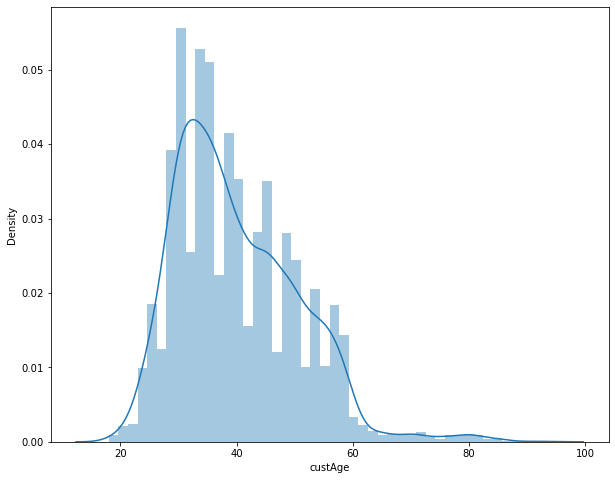

In [31]:
plt.figure(figsize=(10,8))
sns.distplot(data["custAge"])

As we can see in the above distribution also, that most of the customers are in the age range of 20-60.

This seems like a powerlaw distribution where most the values are very low and very few have high values.

## Feature: campaign (numeric)

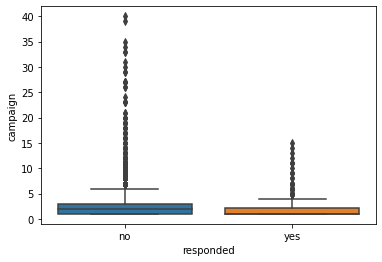

In [32]:
%matplotlib inline
sns.boxplot(data=data, x="responded", y="campaign")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


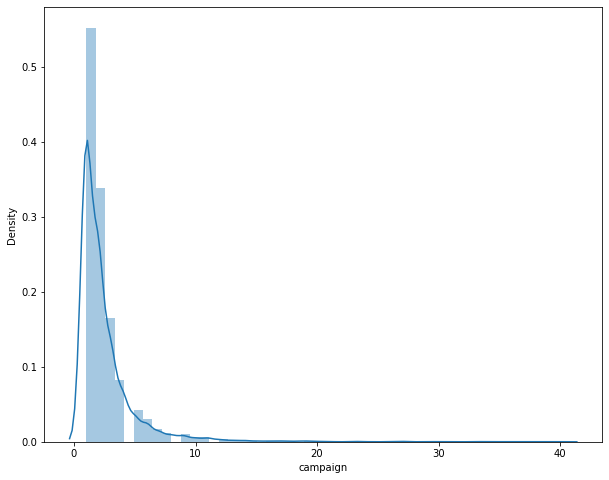

In [33]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["campaign"])
plt.show()

## Feature: pdays (numeric)

In [34]:
data["pdays"].unique()

array([999,   6,   7,   5,   1,   3,  10,  15,   2,  22,  14,   4,   9,
        11,  12,  13,   8,  16,   0,  17,  21], dtype=int64)

In [35]:
data["pdays"].value_counts()

999    7123
6        85
3        82
4        22
7        15
9        15
2        13
12       11
10        8
5         7
13        6
14        5
11        4
15        4
8         3
1         3
0         2
16        2
17        2
22        1
21        1
Name: pdays, dtype: int64

Most of the values are 999, which means that the most of the customers have never been contacted before.

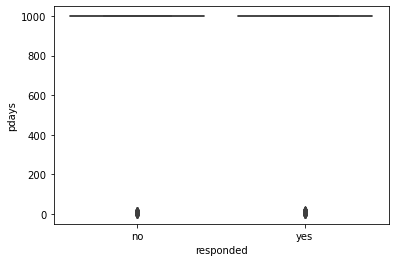

In [36]:
%matplotlib inline
sns.boxplot(data=data, x="responded", y="pdays")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


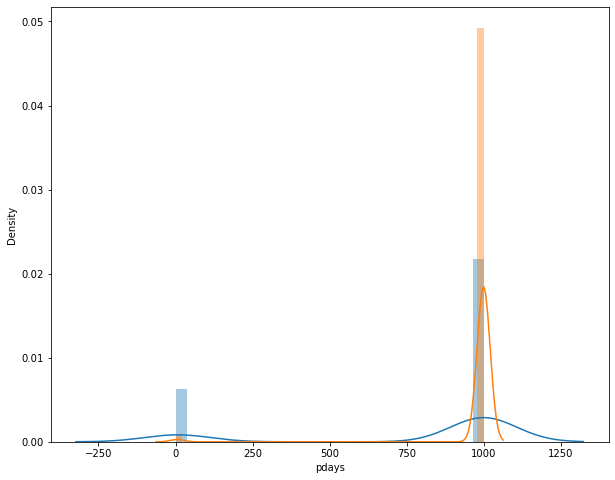

In [37]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data[data["responded"]=="yes"]["pdays"])
sns.distplot(data[data["responded"]=="no"]["pdays"])
plt.show()

## Feature: previous (numeric)

In [38]:
data["previous"].unique()

array([0, 1, 2, 4, 3, 5, 6], dtype=int64)

In [39]:
data["previous"].value_counts()

0    6350
1     855
2     147
3      41
4      13
5       7
6       1
Name: previous, dtype: int64

In [40]:
data[data["responded"]=="yes"]["previous"].value_counts()

0    567
1    176
2     64
3     23
4      6
5      3
6      1
Name: previous, dtype: int64

In [41]:
data[data["responded"]=="no"]["previous"].value_counts()

0    5783
1     679
2      83
3      18
4       7
5       4
Name: previous, dtype: int64

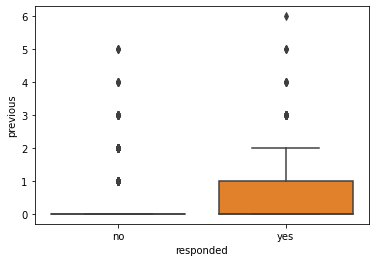

In [42]:
%matplotlib inline
sns.boxplot(data=data, x="responded", y="previous")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


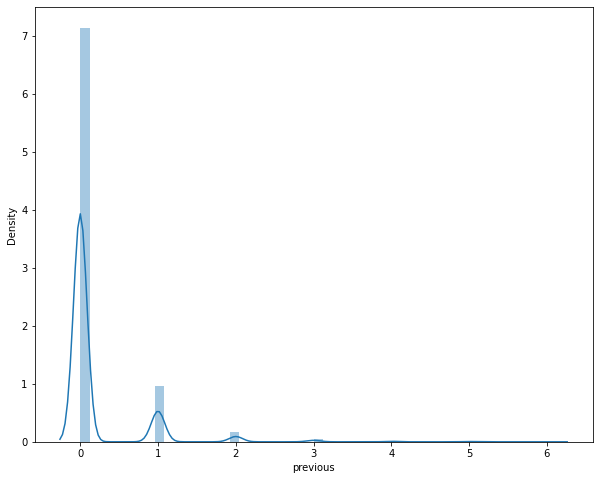

In [43]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["previous"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


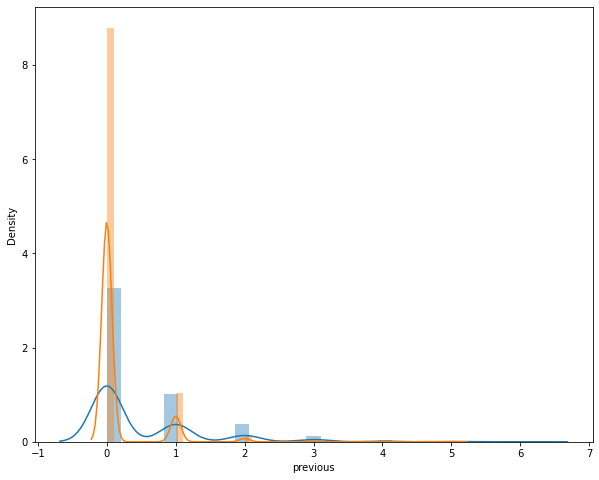

In [44]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data[data["responded"]=="yes"]["previous"])
sns.distplot(data[data["responded"]=="no"]["previous"])
plt.show()

The previous feature is very similarly distributed for both the classes in the target variable. From basic EDA it is not sure how much value this individual feature have on the target variable.

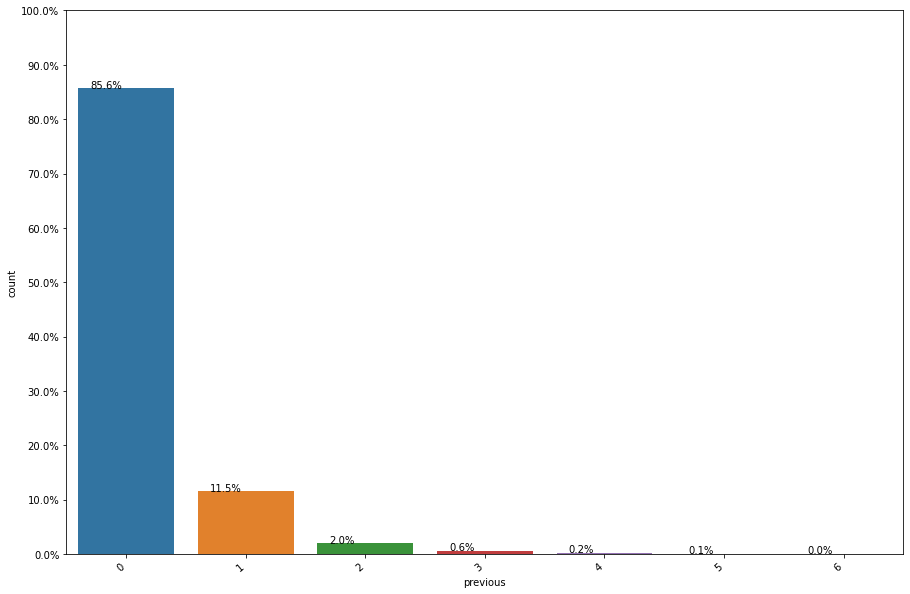

In [45]:
countplot("previous", data)

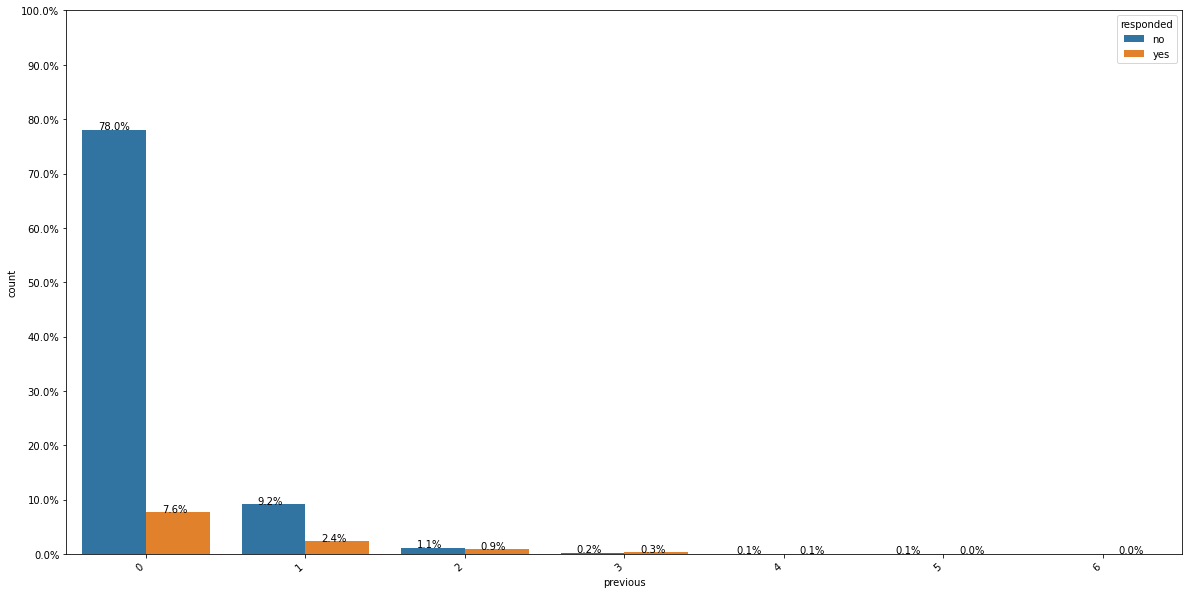

In [46]:
countplot_withY("previous", data)

## emp.var.rate

In [47]:
data["emp.var.rate"].value_counts()

 1.4    2835
-1.8    1712
 1.1    1397
-0.1     674
-2.9     293
-3.4     186
-1.7     152
-1.1     138
-3.0      26
-0.2       1
Name: emp.var.rate, dtype: int64

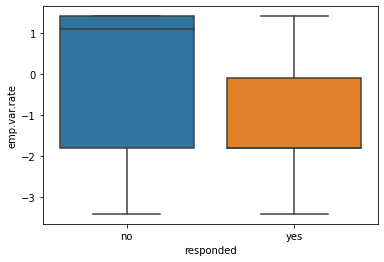

In [48]:
%matplotlib inline
sns.boxplot(data=data, x="responded", y="emp.var.rate")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


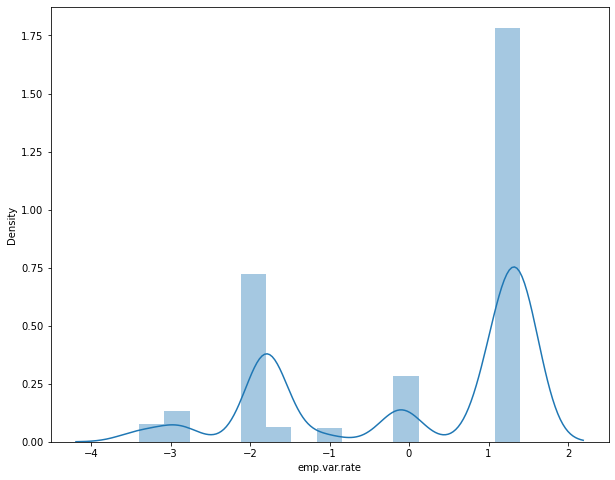

In [49]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["emp.var.rate"])
plt.show()

## cons.price.idx

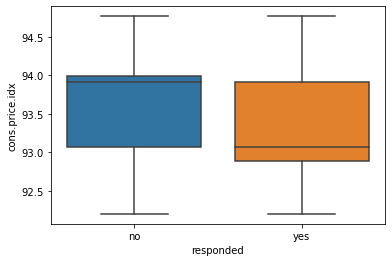

In [50]:
%matplotlib inline
sns.boxplot(data=data, x="responded", y="cons.price.idx")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


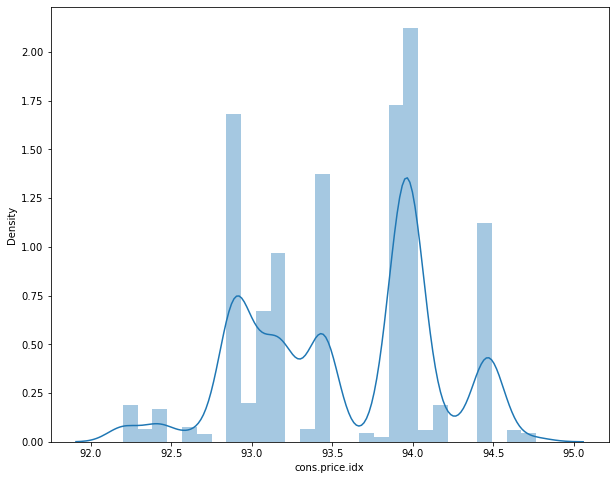

In [51]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["cons.price.idx"])
plt.show()

## cons.conf.idx

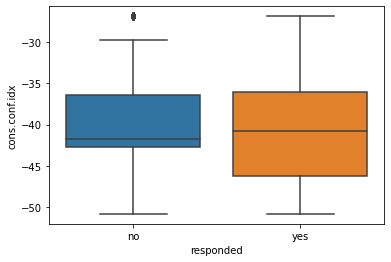

In [52]:
%matplotlib inline
sns.boxplot(data=data, x="responded", y="cons.conf.idx")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


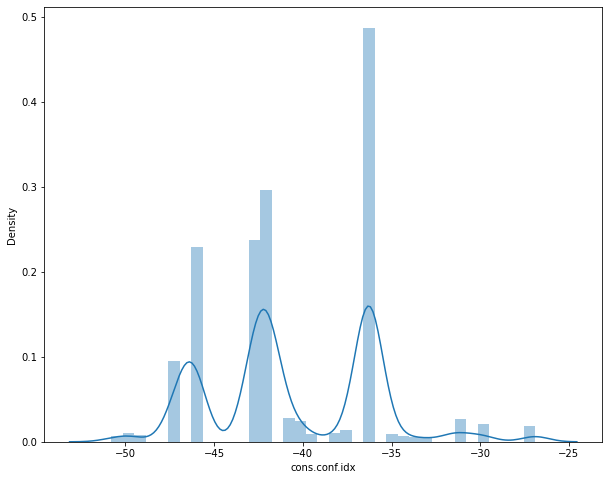

In [53]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["cons.conf.idx"])
plt.show()

## euribor3m

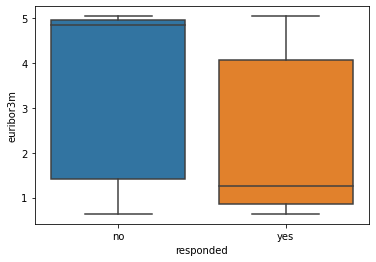

In [54]:
%matplotlib inline
sns.boxplot(data=data, x="responded", y="euribor3m")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


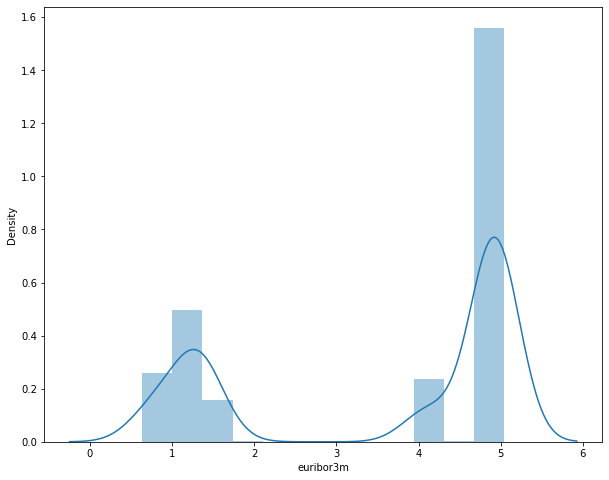

In [55]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["euribor3m"])
plt.show()

## nr.employed

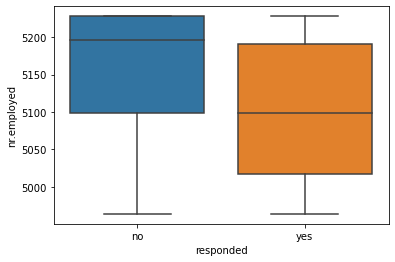

In [56]:
%matplotlib inline
sns.boxplot(data=data, x="responded", y="nr.employed")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


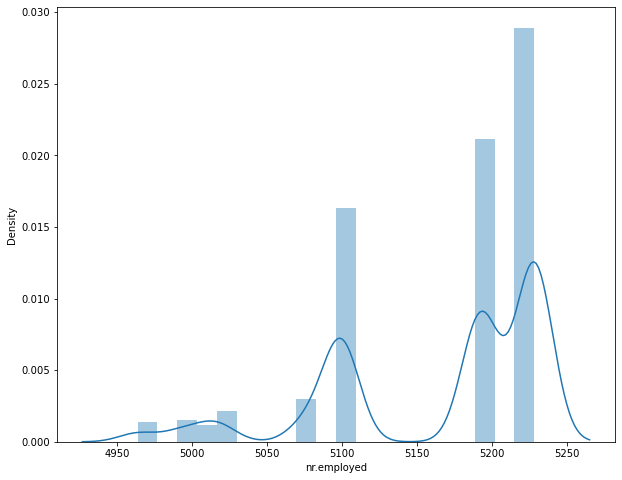

In [57]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["nr.employed"])
plt.show()

## Correlation matrix of numerical features

Text(0.5, 1.05, 'Pearson correlation of Features')

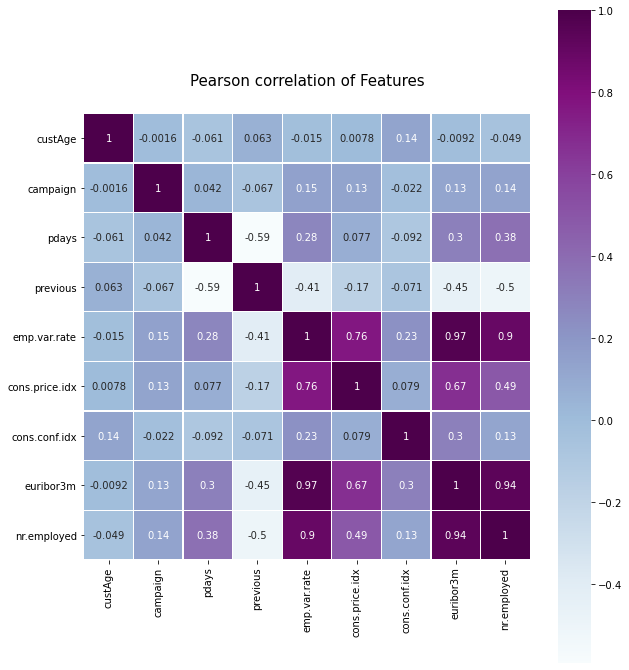

In [58]:
# Idea of correlation matrix of numerical feature: https://medium.com/datadriveninvestor/introduction-to-exploratory-data-analysis-682eb64063ff
%matplotlib inline
corr = data.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="BuPu", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

From the above heatmap we can see that there are some numerical features which share a high correlation between them, e.g nr.employed and euribor3m these features share a correlation value of 0.95, and euribor3m and emp.var.rate share a correlation of 0.97, which is very high compared to the other features that we see in the heatmap.

# Data Preprocessing

## Dealing with duplicate data

In [59]:
data_dup = data[data.duplicated(keep="last")]
data_dup

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,responded
48,NaN,management,married,NaN,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
144,31.0,blue-collar,married,basic.6y,no,yes,no,cellular,jul,fri,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
161,30.0,admin.,single,university.degree,no,yes,no,cellular,aug,thu,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
244,49.0,services,married,high.school,no,no,no,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
254,NaN,blue-collar,married,NaN,no,yes,no,cellular,may,mon,2,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
514,NaN,admin.,single,university.degree,no,yes,no,cellular,aug,thu,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
693,38.0,management,married,university.degree,no,yes,no,cellular,nov,thu,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
713,38.0,blue-collar,married,NaN,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
933,35.0,technician,married,professional.course,no,yes,no,cellular,sep,thu,1,999,2,failure,-1.1,94.199,-37.5,0.878,4963.6,no
968,NaN,technician,married,NaN,no,yes,no,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no


In [60]:
data_dup.shape

(27, 20)

In [61]:
data = data.drop_duplicates()
data.shape

(7387, 20)

## Missing Value Imputation

In [62]:
data.isnull().sum()

custAge           1791
profession           0
marital              0
schooling         2147
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week        709
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
responded            0
dtype: int64

As a numerical variable we can use mean or median to impute the missing values. We will use median to fill the null values as age columns has outliers

In [63]:
data['custAge'].fillna(data['custAge'].median(),inplace=True)
data['schooling'].fillna(data['schooling'].mode()[0], inplace=True)
data['day_of_week'].fillna(data['day_of_week'].mode()[0], inplace=True)

In [64]:
data.isnull().sum()

custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
responded         0
dtype: int64

## Logistic Regression

In [65]:
x_features=list(data.columns)

In [66]:
x_features.remove('responded')

In [67]:
data['responded'] = data['responded'].map(lambda x : 1 if x == 'yes' else 0)

In [68]:
encoded_data = pd.get_dummies(data[x_features], drop_first = True)

In [69]:
encoded_data.head()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,profession_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,55.0,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,...,0,1,0,0,1,0,0,0,1,0
1,38.0,1,999,0,1.4,93.918,-42.7,4.960,5228.1,1,...,0,0,0,0,1,0,0,0,1,0
2,42.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
3,55.0,2,999,0,1.4,93.918,-42.7,4.962,5228.1,0,...,0,0,0,0,0,0,0,1,1,0
4,38.0,5,999,1,-1.8,92.893,-46.2,1.291,5099.1,0,...,1,0,0,0,0,0,1,0,0,0


In [70]:
y=data['responded']
x=encoded_data

In [71]:
x=pd.get_dummies(x)
data=pd.get_dummies(data)

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size =0.8, random_state=42)

In [73]:
from sklearn.linear_model import LogisticRegression
log_regn = LogisticRegression(max_iter = 200)
log_regn.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [75]:
y_pred=log_regn.predict(x_test)

In [79]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8967851099830795

In [80]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5230
           1       0.65      0.22      0.33       680

    accuracy                           0.90      5910
   macro avg       0.78      0.60      0.64      5910
weighted avg       0.88      0.90      0.87      5910



In [82]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
x_train_u,y_train_u = resample(x_train[y_train == 1],
                              y_train[y_train ==1],
                              n_samples = x_train[y_train==0].shape[0],
                              random_state = 1)

In [83]:
x_train[y_train == 1]

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,profession_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
3698,35.0,1,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,...,0,0,0,0,1,0,0,0,1,0
6734,56.0,2,999,0,-1.8,93.075,-47.1,1.410,5099.1,0,...,0,0,0,0,0,1,0,0,1,0
6871,55.0,1,999,0,-2.9,92.201,-31.4,0.825,5076.2,0,...,0,0,0,0,0,0,0,0,1,0
3465,38.0,2,999,1,-1.8,92.893,-46.2,1.264,5099.1,0,...,1,0,0,0,1,0,0,0,0,0
1904,38.0,3,6,2,-1.7,94.215,-40.3,0.861,4991.6,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2737,55.0,1,999,0,1.4,94.465,-41.8,4.958,5228.1,0,...,0,0,0,0,0,1,0,0,1,0
975,32.0,2,999,0,-1.8,93.075,-47.1,1.365,5099.1,0,...,0,0,0,0,0,1,0,0,1,0
2907,68.0,2,999,1,-1.7,94.215,-40.3,0.889,4991.6,0,...,0,0,0,0,1,0,0,0,0,0
4121,22.0,1,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,...,0,0,0,0,0,0,0,0,1,0


In [84]:
y_train[y_train ==1]

3698    1
6734    1
6871    1
3465    1
1904    1
       ..
2737    1
975     1
2907    1
4121    1
2922    1
Name: responded, Length: 160, dtype: int64

In [85]:
x_train_u = np.concatenate((x_train[y_train == 0], x_train_u))

In [86]:
x_train.shape

(1477, 52)

In [87]:
x_train_u

array([[ 33.,   2., 999., ...,   0.,   1.,   0.],
       [ 34.,   1., 999., ...,   0.,   1.,   0.],
       [ 48.,   2., 999., ...,   0.,   1.,   0.],
       ...,
       [ 68.,   2., 999., ...,   0.,   0.,   0.],
       [ 37.,   2., 999., ...,   0.,   0.,   0.],
       [ 52.,   3., 999., ...,   1.,   1.,   0.]])

In [88]:
y_train_u = np.concatenate((y_train[y_train == 0],y_train_u))

In [89]:
print(x_train_u.shape)
print(y_train_u.shape)

(2634, 52)
(2634,)


In [90]:
log_reg_up = LogisticRegression()

In [91]:
log_reg_up.fit(x_train_u,y_train_u)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
print(metrics.classification_report(y_test,log_reg_up.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      5230
           1       0.35      0.62      0.45       680

    accuracy                           0.82      5910
   macro avg       0.65      0.74      0.67      5910
weighted avg       0.88      0.82      0.84      5910



In [93]:
sm = SMOTE(random_state = 12)
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)

In [94]:
log_reg_sm = LogisticRegression(max_iter = 500)

In [95]:
log_reg_sm.fit(x_train_sm,y_train_sm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [96]:
print(metrics.classification_report(y_test,log_reg_sm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      5230
           1       0.37      0.44      0.40       680

    accuracy                           0.85      5910
   macro avg       0.65      0.67      0.66      5910
weighted avg       0.86      0.85      0.86      5910



In [97]:
x_train_d, y_train_d = resample(x_train[y_train == 0],
                               y_train[y_train ==0],
                               n_samples = x_train[y_train ==1].shape[0],
                                random_state=1)

In [98]:
x_train_d = np.concatenate((x_train[y_train == 1],x_train_d))
y_train_d = np.concatenate((y_train[y_train == 1],y_train_d))

In [99]:
log_reg_d = LogisticRegression(max_iter = 500)

In [100]:
log_reg_d.fit(x_train_d,y_train_d)

LogisticRegression(max_iter=500)

In [101]:
print(metrics.classification_report(y_test,log_reg_d.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86      5230
           1       0.30      0.71      0.42       680

    accuracy                           0.77      5910
   macro avg       0.63      0.74      0.64      5910
weighted avg       0.88      0.77      0.81      5910



In [105]:
def confusion_matrix(actuals, predicted):
    cm = metrics.confusion_matrix(actuals, predicted, [1,0])
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Good Response', 'Bad Response'], yticklabels = ['Good Response', 'Bad Response'])

    plt.ylabel("Actual Labels")
    plt.xlabel("Predicted Labels")

    plt.show()

In [106]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[5150,   80],
       [ 530,  150]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


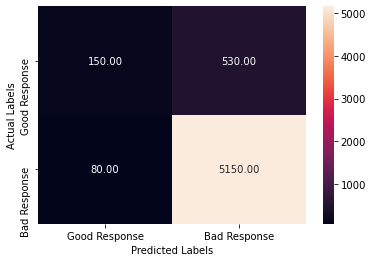

In [107]:
confusion_matrix(y_test, y_pred)